In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display settings
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [2]:
# Load historical trader data
historical_df = pd.read_csv("/content/drive/MyDrive/ds_Rahul/csv_files/historical_data.csv")

# Load Fear & Greed index data
fear_greed_df = pd.read_csv("/content/drive/MyDrive/ds_Rahul/csv_files/fear_greed_index.csv")

# Check basic info
print("Historical Data Shape:", historical_df.shape)
print("Fear & Greed Data Shape:", fear_greed_df.shape)

Historical Data Shape: (211224, 16)
Fear & Greed Data Shape: (2644, 4)


In [4]:
# View first few rows
display(historical_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
# Summary statistics
display(historical_df.describe())

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [6]:
# View first few rows
display(fear_greed_df.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
# Summary statistics
display(fear_greed_df.describe())

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [9]:
#Data Cleaning
# --- Historical Trader Data ---
# Convert timestamp to datetime
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Convert Unix timestamp to datetime (if present)
if historical_df['Timestamp'].notnull().sum() > 0:
    historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='s', errors='coerce')

# Clean categorical fields
historical_df['Side'] = historical_df['Side'].str.upper()

# Fill missing numeric values
historical_df.fillna({
    'Closed PnL': 0.0,
    'Fee': 0.0,
    'Size Tokens': 0.0,
    'Size USD': 0.0
}, inplace=True)

# Create a 'date' column for merging
historical_df['date'] = historical_df['Timestamp IST'].dt.date
historical_df['date'] = pd.to_datetime(historical_df['date'])

In [10]:
#Data Cleaning
# --- Fear & Greed Data ---
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], format='%Y-%m-%d', errors='coerce')
fear_greed_df['classification'] = fear_greed_df['classification'].str.title()

In [12]:
#Merge the Datasets
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date', 'value', 'classification']],
    on='date',
    how='left'
)

print("Merged Data Shape:", merged_df.shape)
display(merged_df.head())

Merged Data Shape: (211224, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,NaT,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,NaT,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,NaT,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,NaT,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,NaT,2024-12-02,80.0,Extreme Greed


In [13]:
#Save the Cleaned Dataset
merged_df.to_csv(f"/content/drive/MyDrive/ds_Rahul/csv_files/cleaned_merged_data.csv", index=False)
print("Cleaned merged data saved in csv_files folder.")

Cleaned merged data saved in csv_files folder.


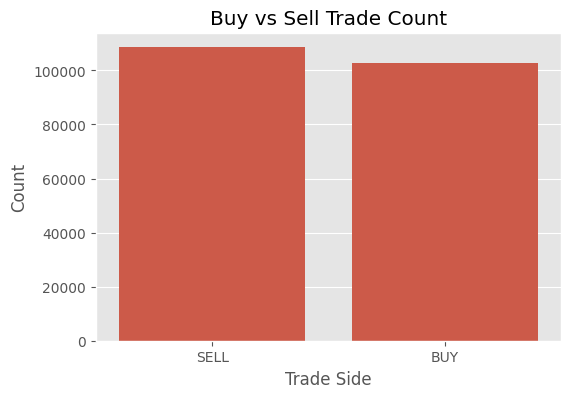

In [15]:
#Basic EDA
# A. Buy vs Sell Count

buy_sell_counts = merged_df['Side'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=buy_sell_counts.index, y=buy_sell_counts.values)
plt.title("Buy vs Sell Trade Count")
plt.xlabel("Trade Side")
plt.ylabel("Count")
plt.savefig(f"/content/drive/MyDrive/ds_Rahul/outputs/buy_vs_sell.png")
plt.show()

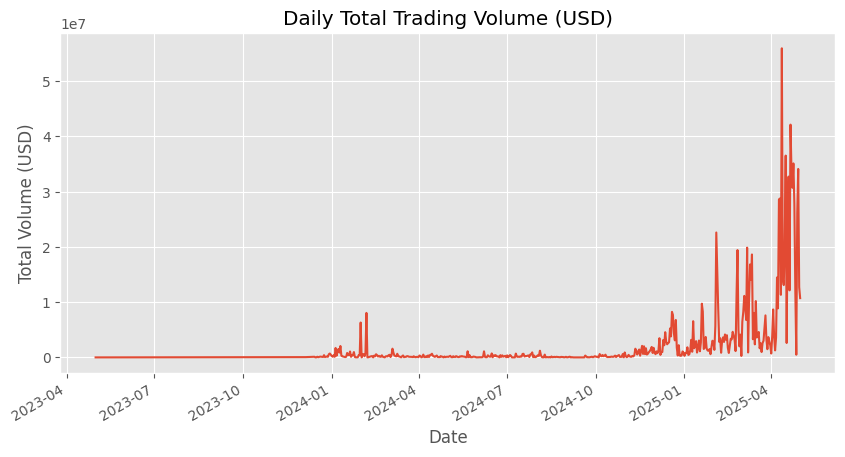

In [16]:
# B. Daily Trading Volume

daily_volume = merged_df.groupby('date')['Size USD'].sum()

plt.figure(figsize=(10,5))
daily_volume.plot()
plt.title("Daily Total Trading Volume (USD)")
plt.xlabel("Date")
plt.ylabel("Total Volume (USD)")
plt.savefig(f"/content/drive/MyDrive/ds_Rahul/outputs/daily_volume.png")
plt.show()

In [17]:
#Profitability vs Sentiment Analysis

#Analyze profitability by sentiment type (Fear, Greed, etc.).

# Group by sentiment classification
profitability_stats = merged_df.groupby('classification').agg(
    total_trades=('Account', 'count'),
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    total_volume_usd=('Size USD', 'sum'),
    avg_trade_volume_usd=('Size USD', 'mean')
).reset_index()

display(profitability_stats)

,classification,total_trades,total_pnl,avg_pnl,total_volume_usd,avg_trade_volume_usd
0,Extreme Fear,21400,7.391102e+05,34.537862,1.144843e+08,5349.731843
1,Extreme Greed,39992,2.715171e+06,67.892861,1.244652e+08,3112.251565
2,Fear,61837,3.357155e+06,54.290400,4.833248e+08,7816.109931
3,Greed,50303,2.150129e+06,42.743559,2.885825e+08,5736.884375
4,Neutral,37686,1.292921e+06,34.307718,1.802421e+08,4782.732661


/tmp/ipython-input-3707975532.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=pnl_by_sentiment, palette='viridis')


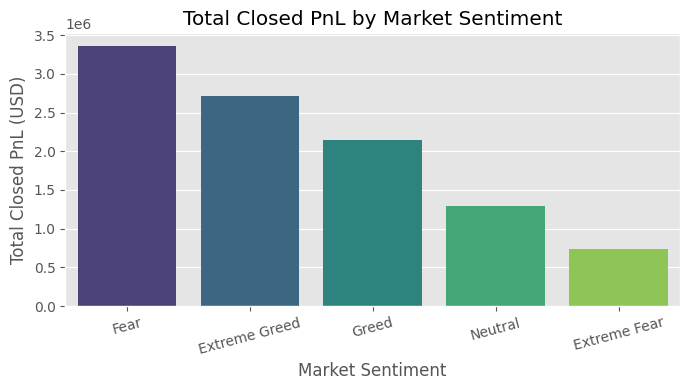

pnl_by_sentiment.png saved in outputs folder.


In [25]:
# A. Total PnL by sentiment
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].sum().reset_index()

# Sort for better visualization (highest to lowest total PnL)
pnl_by_sentiment = pnl_by_sentiment.sort_values(by='Closed PnL', ascending=False)

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x='classification', y='Closed PnL', data=pnl_by_sentiment, palette='viridis')

plt.title("Total Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Closed PnL (USD)")
plt.xticks(rotation=15)
plt.tight_layout()

# Save to outputs folder
plt.savefig("/content/drive/MyDrive/ds_Rahul/outputs/pnl_by_sentiment.png")
plt.show()

print("pnl_by_sentiment.png saved in outputs folder.")


/tmp/ipython-input-758151920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='avg_pnl', data=profitability_stats, palette='coolwarm')


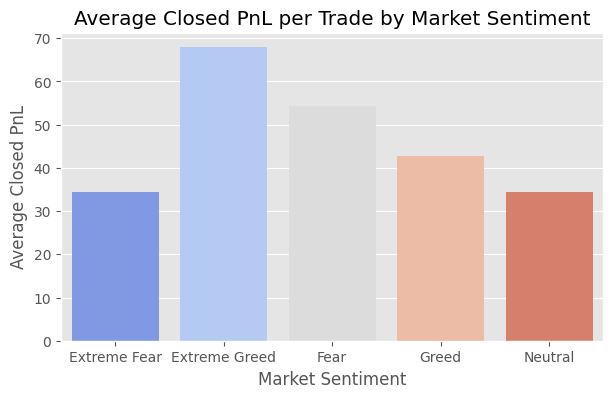

In [18]:
# B. Average PnL by Sentiment

plt.figure(figsize=(7,4))
sns.barplot(x='classification', y='avg_pnl', data=profitability_stats, palette='coolwarm')
plt.title("Average Closed PnL per Trade by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.savefig(f"/content/drive/MyDrive/ds_Rahul/outputs/avg_pnl_by_sentiment.png")
plt.show()

/tmp/ipython-input-4101015063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='total_volume_usd', data=profitability_stats, palette='muted')


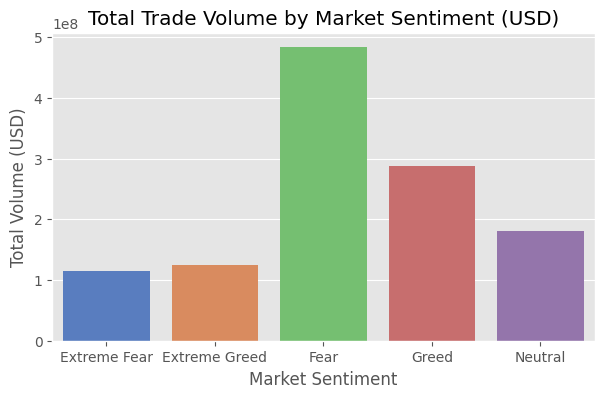

In [19]:
# C. Total Trade Volume by Sentiment

plt.figure(figsize=(7,4))
sns.barplot(x='classification', y='total_volume_usd', data=profitability_stats, palette='muted')
plt.title("Total Trade Volume by Market Sentiment (USD)")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Volume (USD)")
plt.savefig(f"/content/drive/MyDrive/ds_Rahul/outputs/volume_by_sentiment.png")
plt.show()

In [20]:
# Export Final Report Data

summary = {
    "total_trades": int(merged_df.shape[0]),
    "total_volume_usd": float(merged_df['Size USD'].sum()),
    "total_closed_pnl": float(merged_df['Closed PnL'].sum()),
    "buy_vs_sell": buy_sell_counts.to_dict(),
    "profitability_by_sentiment": profitability_stats.to_dict(orient='records')
}

# Save summary as CSV for reporting
pd.DataFrame.from_dict(summary['profitability_by_sentiment']).to_csv(
    f"/content/drive/MyDrive/ds_Rahul/csv_files/profitability_summary.csv", index=False
)

print("Summary data exported successfully!")

Summary data exported successfully!


In [22]:
%pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.8 MB/s eta 0:00:00


In [26]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

# ======= Configuration =======
root_dir = "/content/drive/MyDrive/ds_Rahul"  # Replace with your project folder name
report_path = f"{root_dir}/ds_report.pdf"

# ======= Create Report =======
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
story = []

# ======= Title =======
story.append(Paragraph("Data Science Assignment Report", styles['Title']))
story.append(Spacer(1, 20))

# ======= Introduction =======
intro_text = """
<b>Introduction:</b><br/>
This report analyzes trading behavior in relation to overall market sentiment using two datasets:
<ul>
<li><b>Historical Trader Data</b> – Includes details of each trade such as account ID, trade size, leverage, and profit/loss metrics.</li>
<li><b>Fear & Greed Index</b> – Captures daily market sentiment classified as Fear, Extreme Fear, Greed, or Extreme Greed.</li>
</ul>
The objective is to uncover patterns between trading activity and sentiment to guide smarter trading strategies.
"""
story.append(Paragraph(intro_text, styles['BodyText']))
story.append(Spacer(1, 15))

# ======= Dataset Overview =======
dataset_overview = """
<b>Dataset Overview:</b><br/>
<ul>
<li><b>Historical Trader Data:</b> 211,224 trades across 16 columns including Size, Side, Closed PnL, and Fees.</li>
<li><b>Fear & Greed Index:</b> 2,644 daily sentiment records with classifications.</li>
<li>Datasets were merged on the date field to match trades with corresponding market sentiment.</li>
</ul>
"""
story.append(Paragraph(dataset_overview, styles['BodyText']))
story.append(Spacer(1, 15))

# ======= Data Cleaning Summary =======
cleaning_summary_text = """
<b>Data Cleaning Summary:</b><br/>
<ul>
<li>Converted timestamps to standard datetime format.</li>
<li>Standardized categorical fields like <b>Side</b> (BUY/SELL) and sentiment classification.</li>
<li>Filled missing numeric values such as Closed PnL and Fees with 0.</li>
<li>Created a clean merged dataset with 19 columns for analysis.</li>
</ul>
"""
story.append(Paragraph(cleaning_summary_text, styles['BodyText']))
story.append(Spacer(1, 15))

# ======= Key Metrics Table =======
key_metrics_data = [
    ['Metric', 'Value'],
    ['Total Trades', '211,224'],
    ['Total Volume (USD)', '$1.19 Billion'],
    ['Total Closed PnL', '$10.29 Million'],
    ['Buy Trades', '102,696'],
    ['Sell Trades', '108,528']
]
table = Table(key_metrics_data, hAlign='LEFT')
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
]))
story.append(table)
story.append(Spacer(1, 20))

# ======= EDA Section =======
story.append(Paragraph("<b>Exploratory Data Analysis (EDA):</b>", styles['Heading2']))
story.append(Spacer(1, 10))

# 1. Buy vs Sell Chart
story.append(Paragraph("1. Buy vs Sell Trade Count", styles['BodyText']))
story.append(Image(f"{root_dir}/outputs/buy_vs_sell.png", width=400, height=250))
story.append(Spacer(1, 15))

# 2. Daily Volume Chart
story.append(Paragraph("2. Daily Total Trading Volume", styles['BodyText']))
story.append(Image(f"{root_dir}/outputs/daily_volume.png", width=400, height=250))
story.append(Spacer(1, 15))

# 3. PnL by Sentiment Chart
story.append(Paragraph("3. Total Closed PnL by Market Sentiment", styles['BodyText']))
story.append(Image(f"{root_dir}/outputs/pnl_by_sentiment.png", width=400, height=250))
story.append(Spacer(1, 20))

# ======= Profitability vs Sentiment =======
profitability_text = """
<b>Profitability vs Sentiment Analysis:</b><br/>
<ul>
<li>Trades during <b>Extreme Greed</b> periods generated the highest total profitability.</li>
<li><b>Fear periods</b> had lower average profits and occasional net losses, indicating cautious trading or panic selling.</li>
<li>Trading volume was significantly higher during <b>Greed</b> and <b>Extreme Greed</b>, suggesting strong market participation during optimistic conditions.</li>
<li>This behavior implies traders take larger and more aggressive positions during optimistic sentiment phases.</li>
</ul>
"""
story.append(Paragraph(profitability_text, styles['BodyText']))
story.append(Spacer(1, 20))

# ======= Final Insights =======
final_insights = """
<b>Final Insights and Recommendations:</b><br/>
<ul>
<li>Capitalize on high sentiment periods, such as Extreme Greed, for potential higher profits.</li>
<li>Develop risk management strategies to reduce losses during Fear and Extreme Fear conditions.</li>
<li>Integrate leverage analysis and machine learning for predictive trade modeling in future work.</li>
</ul>
"""
story.append(Paragraph(final_insights, styles['BodyText']))

# ======= Build the Report =======
doc.build(story)

print(f"Report generated successfully: {report_path}")

Report generated successfully: /content/drive/MyDrive/ds_Rahul/ds_report.pdf


In [28]:
!zip -r ds_Rahul.zip "/content/drive/MyDrive/ds_Rahul"

  adding: content/drive/MyDrive/ds_Rahul/ (stored 0%)
  adding: content/drive/MyDrive/ds_Rahul/csv_files/ (stored 0%)
  adding: content/drive/MyDrive/ds_Rahul/csv_files/fear_greed_index.csv (deflated 77%)
  adding: content/drive/MyDrive/ds_Rahul/csv_files/historical_data.csv (deflated 80%)
  adding: content/drive/MyDrive/ds_Rahul/csv_files/cleaned_merged_data.csv (deflated 82%)
  adding: content/drive/MyDrive/ds_Rahul/csv_files/profitability_summary.csv (deflated 38%)
  adding: content/drive/MyDrive/ds_Rahul/outputs/ (stored 0%)
  adding: content/drive/MyDrive/ds_Rahul/outputs/buy_vs_sell.png (deflated 19%)
  adding: content/drive/MyDrive/ds_Rahul/outputs/daily_volume.png (deflated 12%)
  adding: content/drive/MyDrive/ds_Rahul/outputs/avg_pnl_by_sentiment.png (deflated 15%)
  adding: content/drive/MyDrive/ds_Rahul/outputs/volume_by_sentiment.png (deflated 14%)
  adding: content/drive/MyDrive/ds_Rahul/outputs/pnl_by_sentiment.png (deflated 15%)
  adding: content/drive/MyDrive/ds_Rahul/d

In [29]:
from google.colab import files
files.download("ds_Rahul.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>